importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline



importing the dataset

In [2]:
data = pd.read_csv('AirPassengers.csv')

parse strings to datetime type

In [3]:
data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format = True)
indexedData = data.set_index(['Month'])

In [4]:
from datetime import datetime
indexedData.head()


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
indexedData.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


Plotting a graph between the two columns

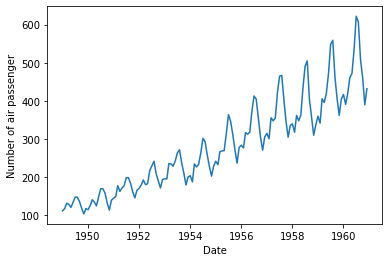

In [6]:
plt.xlabel('Date')
plt.ylabel('Number of air passenger')
plt.plot(indexedData)

We can deduce from the graph plotted that this data is non_stationary, because the graph gives an upward trend and mean is not constant, but varies with time.

Determining the rolling Statistics(Calculating the mean and the standard deviation(std)). The 12 implies number of months. For daily, we use 365.

In [7]:
rolmean = indexedData.rolling(window = 12).mean()

rolstd = indexedData.rolling(window = 12).std()

print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


Plotting the Rolling Statistics

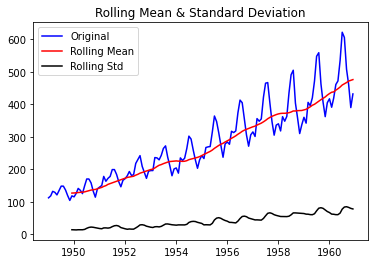

In [8]:
orig = plt.plot(indexedData, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

From the graph, we can conclude that the mean and standard deviation are not constant, which implies that the data is not stationary

Performing Dickey-Fuller Test

In [9]:
from statsmodels.tsa.stattools import adfuller
print('Result of Dickey-Fuller Test:')

dftest = adfuller(indexedData['#Passengers'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '#Lags Used', 'Number of Observation Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key] = value
    
    
print(dfoutput)    

Result of Dickey-Fuller Test:
Test Statistics                 0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical Value(1%)             -3.481682
Critical Value(5%)             -2.884042
Critical Value(10%)            -2.578770
dtype: float64


AIC gives the all the information of what is needed to test in time series analysis and gives the exact and actual value and analyses the difference between them
NB
- The p-value should always be low
- The Critical values should be more than the test statistic value.
with this, we cannot reject the null hypothesis and therefore this datais not stationary

Estimating The Trend by taking the log of the dataset

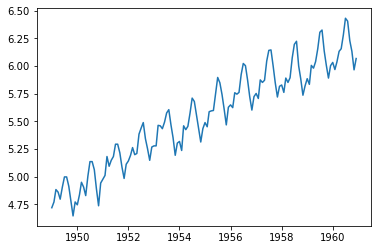

In [10]:
indexedData_logscale = np.log(indexedData)
plt.plot(indexedData_logscale)

Calculating the Moving average and the moving standard deviation with the same window and the indexedData_logscale dataset will be used

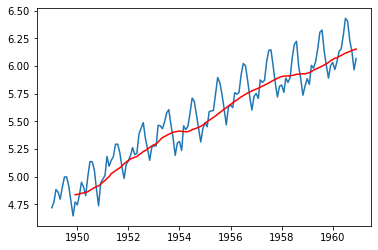

In [11]:
Moving_Average = indexedData_logscale.rolling(window=12).mean()
Moving_Std = indexedData_logscale.rolling(window=12).std()
plt.plot(indexedData_logscale)
plt.plot(Moving_Average, color = 'red')


Data still not staionary

Determining the difference between the moving average and the lindexedData_logscale number of passenger

In [12]:
indexedData_logscale_Moving_Average = indexedData_logscale - Moving_Average
indexedData_logscale_Moving_Average.head(12)
#removing the Nan values

indexedData_logscale_Moving_Average.dropna(inplace = True)
indexedData_logscale_Moving_Average.head(12)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


 Creating a function with for making te data stationary 

In [13]:
from statsmodels.tsa.stattools import adfuller


def test_stationarity(timeseries):
    
    # Determine the rolling statistics
    Moving_Average = timeseries.rolling(window=12).mean() 
    Moving_std= timeseries.rolling(window=12).std()
   

    # Ploting the rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(Moving_Average, color = 'red', label = 'Rolling Mean')
    std = plt.plot(Moving_std, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    # Perform Dickey-Fuller test
    print('Result of Dickey-Fuller Test:')

    dftest = adfuller(timeseries['#Passengers'], autolag = 'AIC')

    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '#Lags Used', 'Number of Observation Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value

    print(dfoutput)    

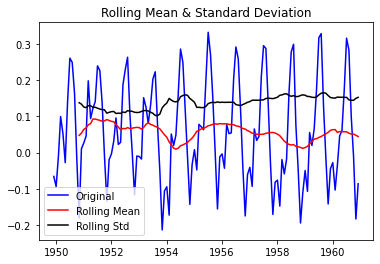

Result of Dickey-Fuller Test:
Test Statistics                -3.162908
p-value                         0.022235
#Lags Used                     13.000000
Number of Observation Used    119.000000
Critical Value(1%)             -3.486535
Critical Value(5%)             -2.886151
Critical Value(10%)            -2.579896
dtype: float64


In [14]:
test_stationarity(indexedData_logscale_Moving_Average)

This is stationary, just to transform it more, Next is to calculate the weighted average of the time series, this is to determine the trend of the time series.

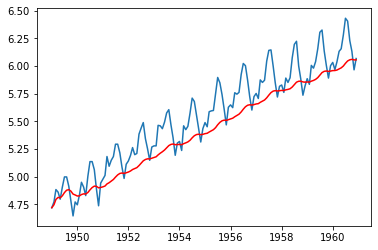

In [15]:
Exponetial_DWA = indexedData_logscale.ewm(halflife=12, min_periods = 0, adjust = True).mean()

plt.plot(indexedData_logscale)
plt.plot(Exponetial_DWA, color = 'red')

As the time series is increasing, the average is also increasing towards the highest time. the trend is upward and keeps on increasing with time

Lookng at another transformation

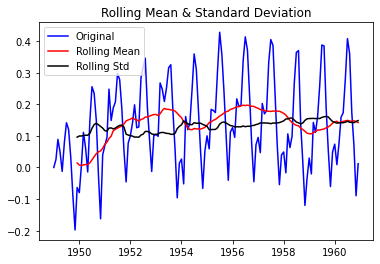

Result of Dickey-Fuller Test:
Test Statistics                -3.601262
p-value                         0.005737
#Lags Used                     13.000000
Number of Observation Used    130.000000
Critical Value(1%)             -3.481682
Critical Value(5%)             -2.884042
Critical Value(10%)            -2.578770
dtype: float64


In [16]:
data_logscale_movingExponetialDWA = indexedData_logscale - Exponetial_DWA
test_stationarity(data_logscale_movingExponetialDWA)

we can see from the p-value and the critical value when compared with the test statistic that thedata is stationary

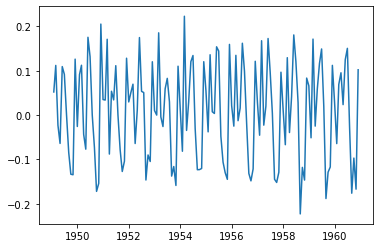

In [17]:
datalogdiffshifting = indexedData_logscale - indexedData_logscale.shift()
plt.plot(datalogdiffshifting)

Here, we have taken a lag of 1, i.e the values have been shifted by 1 or differentiated the time series once. This means for the Arima model, d = 1

In [18]:
datalogdiffshifting.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022


 Dropping the Nan values and putting the shifted data into the stationarity test function

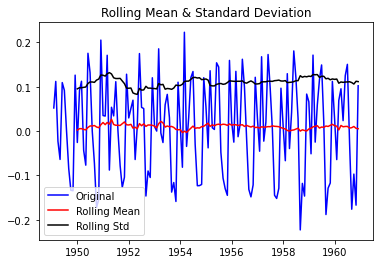

Result of Dickey-Fuller Test:
Test Statistics                -2.717131
p-value                         0.071121
#Lags Used                     14.000000
Number of Observation Used    128.000000
Critical Value(1%)             -3.482501
Critical Value(5%)             -2.884398
Critical Value(10%)            -2.578960
dtype: float64


In [19]:
datalogdiffshifting.dropna(inplace = True)
test_stationarity(datalogdiffshifting)

Here the Null Hypothesis is rejected and the time series is very stationary

In [20]:
datalogdiffshifting.head()

,#Passengers
Month,
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
1949-06-01,0.109484


Checking through the components of the time series

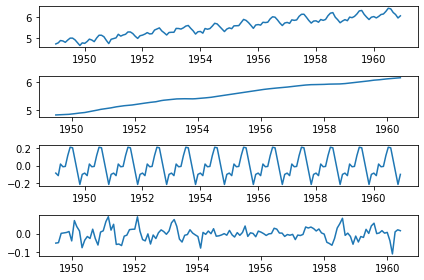

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedData_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(4,1,1)
plt.plot(indexedData_logscale, label = 'Original')
plt.plot(loc = 'best')

plt.subplot(4,1,2)
plt.plot(trend, label = 'Trend')
plt.plot(loc = 'best')

plt.subplot(4,1,3)
plt.plot(seasonal, label = 'Seasonal')
plt.plot(loc = 'best')

plt.subplot(4,1,4)
plt.plot(residual, label = 'Residual')
plt.plot(loc = 'best')

plt.tight_layout()



In [23]:
decomposedLogData.head()

NameError: name 'decomposedLogData' is not defined

In [ ]:
headers=['Month','#Passengers']
decomposedLogData.columns = headers

In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)

Since we now know the value of d, how do we now determine the value P and the value of Q.
We have to plot the ACF and the PACF graphs

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


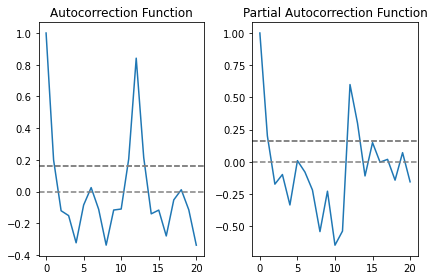

In [24]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datalogdiffshifting, nlags = 20)
lag_pacf = pacf(datalogdiffshifting, nlags = 20, method = 'ols')

# Plotting the acf graph

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(datalogdiffshifting)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(datalogdiffshifting)), linestyle = '--', color = 'gray')
plt.title('Autocorrection Function')



# plotting the pacf graph

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(datalogdiffshifting)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(datalogdiffshifting)), linestyle = '--', color = 'gray')
plt.title('Partial Autocorrection Function')
plt.tight_layout()

In order to calculate the P and Q value, we need to check the value where the graph begins to cut-off or drop to 0 for the first line on the X-axis. Checking the two graphs above, we can see that this happens at the value 2 at both graphs which implies that P = 2 and Q = 2


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

Plotting AR Model


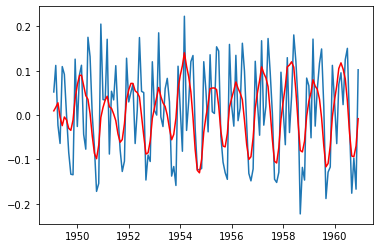

In [25]:
from statsmodels.tsa.arima_model import ARIMA

# AR MODEl

model = ARIMA(indexedData_logscale, order = (2,1,2))
result_AR = model.fit(disp = -1)
plt.plot(datalogdiffshifting)
plt.plot(result_AR.fittedvalues, color = 'red')

print ('Plotting AR Model')

In [26]:
#plt.title = ('RSS: %.4f'%sum((result_AR.fittedvalues - datalogdiffshifting['#Passenger'])**2))



#check this online

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting AR Model


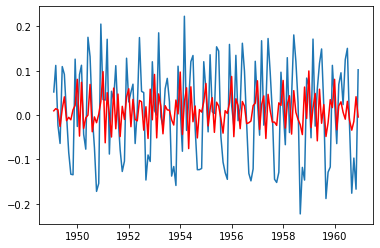

In [27]:
# MA MODEl

model = ARIMA(indexedData_logscale, order = (0,1,2))
result_MA = model.fit(disp = -1)
plt.plot(datalogdiffshifting)
plt.plot(result_MA.fittedvalues, color = 'red')

print ('Plotting AR Model')

In [28]:
#plt.title = ('RSS: %.4f'%sum((result_AR.fittedvalues - datalogdiffshifting['#Passenger'])**2))


Using the (2,1,2) because  it has the lowest RSS

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting AR Model


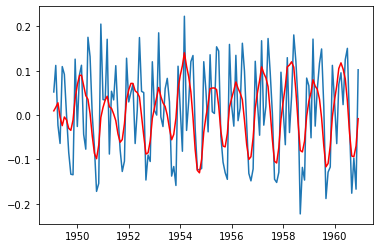

In [29]:
# MA MODEl

model = ARIMA(indexedData_logscale, order = (2,1,2))
result_ARIMA = model.fit(disp = -1)
plt.plot(datalogdiffshifting)
plt.plot(result_ARIMA.fittedvalues, color = 'red')

print ('Plotting AR Model')

Fitting the model result in a combined model i.e making it into a series format

In [30]:
prediction_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues, copy = True)
print(prediction_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


Finding the cumulative sum

In [31]:
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [37]:
prediction_ARIMA_log = pd.Series(indexedData_logscale['#Passengers'], index = indexedData_logscale.index)

prediction_ARIMA_log2 = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum, fill_value = 0)
prediction_ARIMA_log2.head()

Month
1949-01-01    4.718499
1949-02-01    4.780265
1949-03-01    4.909873
1949-04-01    4.914554
1949-05-01    4.846011
dtype: float64

In [38]:
indexedData_logscale.head()

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


Taking the Exponent of the predicted values to returen them back to its actual value

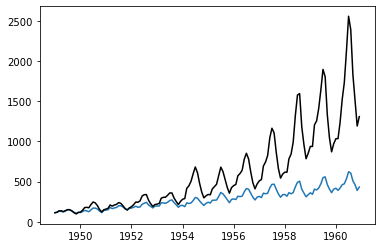

In [40]:
predictions_ARIMA = np.exp(prediction_ARIMA_log2)
plt.plot(indexedData)
plt.plot(predictions_ARIMA, color = 'black')

For predicting, check the number of rows, then add the number of months you want to predict

In [41]:
indexedData

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


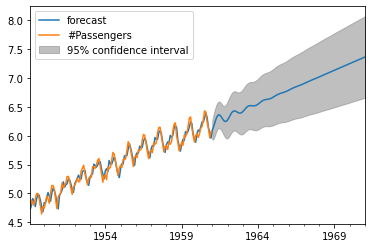

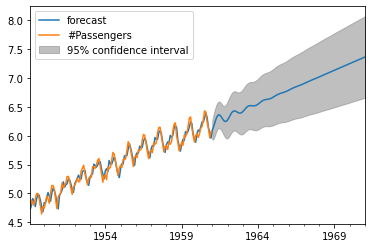

In [48]:
result_ARIMA.plot_predict(1,264)  #(# no of rows * 10years i.e 120 months)

In [50]:
X = result_ARIMA.forecast(steps = 120) #(10 years i.e 120 m0nths)
print(X)

(array([6.09553386, 6.1528139 , 6.2244295 , 6.29241086, 6.34164705,
       6.36359356, 6.35784688, 6.33139312, 6.29597552, 6.26447726,
       6.24738334, 6.25025174, 6.27275832, 6.30940302, 6.3515148 ,
       6.38988643, 6.41727373, 6.43011051, 6.42906692, 6.41842496,
       6.40456165, 6.39403625, 6.39183089, 6.40019505, 6.41833689,
       6.44295401, 6.46937428, 6.49293979, 6.51024115, 6.51989034,
       6.52267583, 6.52112394, 6.51864535, 6.51853697, 6.52311928,
       6.53322363, 6.54812869, 6.56591555, 6.58410306, 6.60036538,
       6.61313266, 6.62192784, 6.62737793, 6.63093135, 6.63438696,
       6.63937991, 6.6469651 , 6.65739845, 6.67015327, 6.68414253,
       6.69806628, 6.71077903, 6.72157735, 6.73033988, 6.73749817,
       6.74386385, 6.7503733 , 6.757826  , 6.76668688, 6.77699829,
       6.78841324, 6.80032858, 6.81207199, 6.82308765, 6.83307142,
       6.84202499, 6.85022319, 6.85811229, 6.86617348, 6.87479159,
       6.8841631 , 6.89426391, 6.90487896, 6.91567945, 6.9263